# Method 1 - Neural Network

Epoch 1/3
  3/591 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.0964 - loss: 3.4907

C:\Users\speed\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.7725 - loss: 0.7541 - val_accuracy: 0.9452 - val_loss: 0.2039
Epoch 2/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - accuracy: 0.9474 - loss: 0.1743 - val_accuracy: 0.9724 - val_loss: 0.0884
Epoch 3/3
591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9593 - loss: 0.1314 - val_accuracy: 0.9833 - val_loss: 0.0481
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
  Accuracy: 0.9833333333333333
  Precision: 0.9834361263957081
  Recall: 0.9830249221704692
  F1-score: 0.9830155340700646


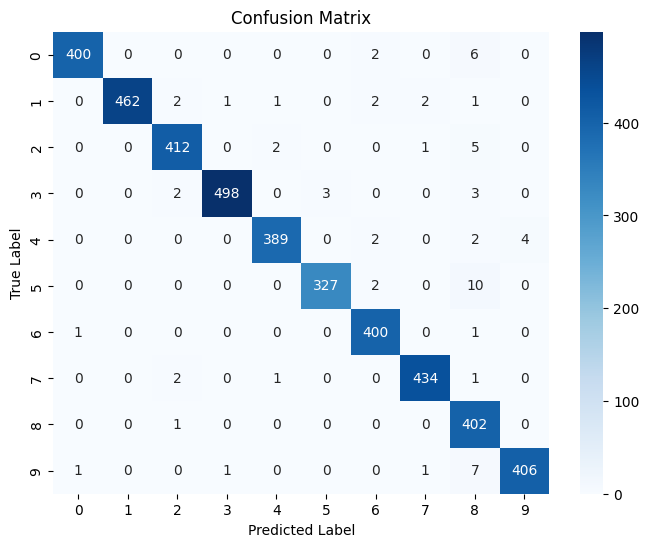

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess the data
X_train = train_data.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train_data['label'].values
X_test = test_data.values.astype('float32') / 255.0

# Reshape input data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Data augmentation
# Helps improve the model's generalization and robustness
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(X_train)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Convolutional neural network (CNN) model using TensorFlow's Keras API
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Define input shape explicitly
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Creates a 2D convolutional layer with 32 filters/kernels of size 3x3
    tf.keras.layers.BatchNormalization(), # Normalizes the activations of the previous layer, improving training speed and stability
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Creates another 2D convolutional layer with 64 filters/kernels of size 3x3
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(2, 2), # Performs max pooling with a pool size of 2x2, reducing the spatial dimensions of the input
    tf.keras.layers.Dropout(0.25), # Randomly sets a fraction (25%) of the input units to 0 at each update during training, which helps prevent overfitting
    tf.keras.layers.Flatten(), # Flattens the input, converting it into a 1D array, which is required before passing it to a fully connected (dense) layer
    tf.keras.layers.Dense(128, activation='relu'), # Adds a fully connected layer with 128 neurons
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5), # Randomly sets a fraction (50%) of the input units to 0 at each update during training
    tf.keras.layers.Dense(10, activation='softmax') # Outputs probability scores for each class
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Increasing Epoch can potenially increase accuracy up to a certain point
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=3, validation_data=(X_val, y_val))

# Make predictions on validation data
val_predictions = np.argmax(model.predict(X_val), axis=1)

# Print classification report
report = classification_report(y_val, val_predictions, output_dict=True)
print("Classification Report:")
print(f'  Accuracy: {report["accuracy"]}')
print(f'  Precision: {report["macro avg"]["precision"]}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, val_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Make predictions on test data
predictions = np.argmax(model.predict(X_test), axis=1)

# Create submission DataFrame
submission_df = pd.DataFrame({'ImageId': range(1, len(predictions) + 1), 'Label': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_neuralNetwork.csv', index=False)


# Method 2 - SVM

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocess the data
X_train = train_data.drop('label', axis=1).values.astype('float32')
y_train = train_data['label'].values
X_test = test_data.values.astype('float32')

# Scale the features
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Split the training data into training and validation sets
X_train_scaled, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.1, random_state=42)

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)  # Initializing Support Vector Classifier with Radial Basis Function kernel

# Train the SVM classifier
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Make predictions on the validation set
y_val_pred = svm_clf.predict(X_val)

# Create submission DataFrame
submission_df = pd.DataFrame({'ImageId': range(1, len(y_pred) + 1), 'Label': y_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_svm.csv', index=False)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy on Validation Set:", accuracy)

# Calculate precision
precision = precision_score(y_val, y_val_pred, average='weighted')
print("Precision on Validation Set:", precision)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix on Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plotting images
num_images = 100
plt.figure(figsize=(20, 100))  # Adjusting figure size
for i in range(num_images):
    plt.subplot(num_images, 1, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}', fontsize=10)  # Adjusting title font size
    plt.axis('off')
    if i != num_images - 1:
        plt.subplots_adjust(hspace=0.5)  # Adjusting gap between images
plt.show()
